## Experiment 01


### Loading related functions and libraries

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
random.seed(1337)

def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return value

### Loading preprocessed data by Richardson

Creates three dictionaries:
 * `richardson_data`
 
 All choices as vectors, e.g. `{'fled': [7.2, 4.2, 80.8, 7.8], 'pointed at': [7.2, 3.6, 0.0, 89.2] ...`
 
 * `richardson_categorial`
 
 Maximum choice as binary choice, e.g. `{'fled': [0, 0, 1, 0], 'pointed at': [0, 0, 0, 1] ...`
 
 * `richardson_normed`
 
 Maximum choice divided by all choices, disregarding all other choices, e.g.  `{'fled': [0.0, 0.0, 0.808, 0.0], 'pointed at': [0.0, 0.0, 0.0, 0.892] ...`
 

In [ ]:
with open("../../data/richardson_actions.txt", "r") as d_in:
    lines = [line.split() for line in d_in.readlines()]

output = []
for entry in lines:
    new_entry = [convert_to_float(item) for item in entry]
    
    if isinstance(new_entry[1],str):
        new_entry[0] = " ".join(new_entry[:2])
        del new_entry[1]
    output.append(new_entry)

richardson_data = dict()
for elem in output:
    richardson_data[elem[0]] = [i for i in elem[1:]]

# Randomizing Richardson's data
action_words = list(richardson_data.keys())
random.shuffle(action_words)

richardson_categorial = dict()
for k, v in richardson_data.items():
    if k == 0:
        continue
    vals = [0,0,0,0]
    vals[v.index(max(v))] = 1

    richardson_categorial[k] = vals
richardson_normed = dict()

for action, values in richardson_data.items():
    if action == 0:
        continue
    
    richardson_normed[action] = [round(val/sum(values),4) for val in values]

## Choose model type

In [ ]:
model_type = "meta-llama"
model_name = "Llama-2-70b-hf"

## Load model results

In [ ]:
model_choices = dict()
with open("results/exp01a_"+model_name+".txt", "r") as f_in:
    lines = f_in.readlines()

for idx,line in enumerate(lines):
    if idx == 0:
        continue
    parts = line.split("\t")
    parts[-1].replace("\n","")
    model_choices[parts[0]] = [int(x) for x in parts[1:]]

In [ ]:
similarity_scores_items = {}
similarity_scores_constructs = {'Horizontal':0, 'Neutral':0, 'Vertical':0, 'Horizon.':0, 'Neutr.':0, 'Vertic.':0}

for idx, key in enumerate(richardson_normed):

    # for each item
    vec1 = np.array(richardson_normed[key])
    vec2 = np.array(model_choices[key])
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    similarity_scores_items[key] = similarity

print(similarity_scores_items)

count = 0
for i in range(0,len(similarity_scores_items),5):
    current_constr = list(similarity_scores_constructs.keys())[count]
    constr_sum = round((sum(list(similarity_scores_items.values())[i:i+4])/5),4)
    similarity_scores_constructs[current_constr] = constr_sum
    count+=1

print(similarity_scores_constructs)

In [ ]:
data = similarity_scores_constructs

# Set a custom color palette
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(8, 5))

sns.set_style("whitegrid")
sns.barplot(x=list(data.values()), y=list(data.keys()), palette=custom_palette)

plt.xlabel('Similarity (Normed Cosine)', fontsize=12)
plt.ylabel('Low Abstraction            High Abstraction', fontsize=12)
plt.title(model_name+' Comparison', fontsize=14)

# Adding data values next to the bars
for i, value in enumerate(data.values()):
    plt.text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=10, color='black')

# Set x-axis limits
plt.xlim(0, 1)

# Remove spines (borders) from the plot
sns.despine()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.savefig("results/exp01a_"+model_name+"_CosSim.png")
plt.show()


In [ ]:
from IPython.display import Markdown as md
average_sim = sum(similarity_scores_constructs.values())/len(similarity_scores_constructs.values())
md("## The average similarity is: **{}** ".format(average_sim))

# random: 
# llama2-7b: 0.374
# llama2-13b: 0.347
# llama2-70b: 0.316


In [30]:
print(richardson_normed)
print(model_choices)

{'fled': [0.072, 0.042, 0.808, 0.078], 'pointed at': [0.072, 0.036, 0.0, 0.892], 'pulled': [0.06, 0.054, 0.754, 0.132], 'pushed': [0.072, 0.036, 0.012, 0.88], 'walked': [0.0905, 0.0362, 0.2412, 0.6322], 'hunted': [0.0959, 0.2038, 0.018, 0.6823], 'impacted': [0.072, 0.371, 0.03, 0.527], 'perched': [0.12, 0.76, 0.066, 0.054], 'showed': [0.1499, 0.0899, 0.1019, 0.6583], 'smashed': [0.036, 0.665, 0.012, 0.287], 'bombed': [0.048, 0.868, 0.018, 0.066], 'flew': [0.377, 0.443, 0.15, 0.03], 'floated': [0.329, 0.563, 0.078, 0.03], 'lifted': [0.874, 0.096, 0.024, 0.006], 'sank': [0.2218, 0.7183, 0.042, 0.018], 'argued with': [0.1139, 0.1379, 0.1259, 0.6224], 'gave to': [0.084, 0.096, 0.012, 0.808], 'offended': [0.09, 0.317, 0.246, 0.347], 'rushed': [0.1025, 0.1085, 0.2352, 0.5538], 'warned': [0.1079, 0.2218, 0.0599, 0.6104], 'owned': [0.0539, 0.5564, 0.1858, 0.2038], 'regretted': [0.1978, 0.2398, 0.4126, 0.1499], 'rested': [0.144, 0.365, 0.401, 0.09], 'tempted': [0.168, 0.114, 0.455, 0.263], 'wan

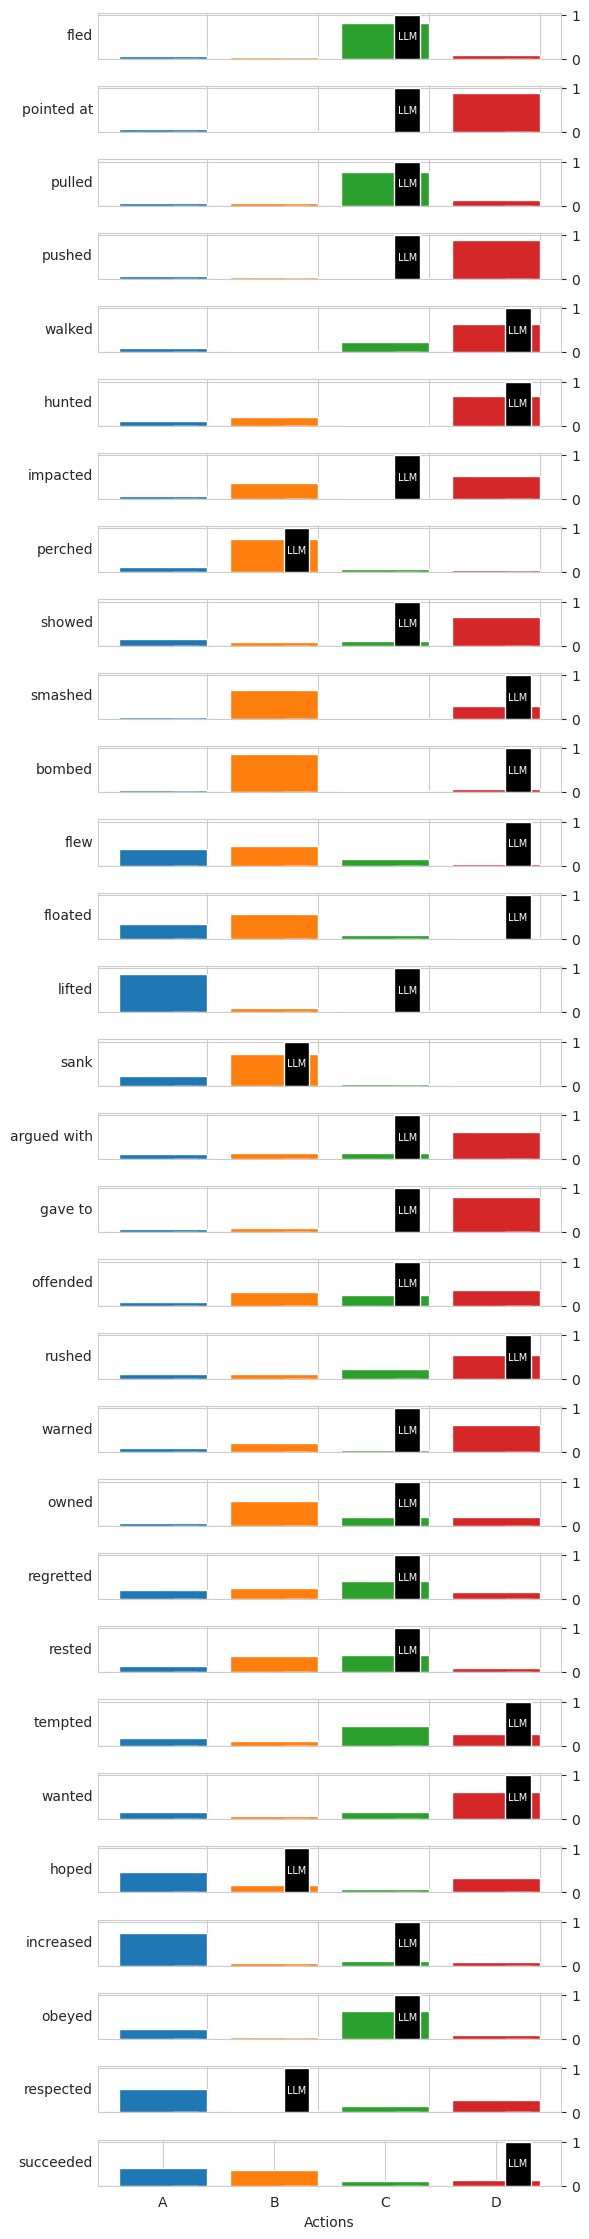

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data_old = richardson_normed
data_new = model_choices

action_names = list(data_old.keys())
num_actions = len(action_names)
num_subplots = len(data_old[action_names[0]])

fig_width = 6
fig, axes = plt.subplots(num_actions, 1, figsize=(fig_width, .75*num_actions))
fig.subplots_adjust(hspace=0.5)

bar_width_old = 0.8  # Width of the old bars
bar_width_new = bar_width_old / 3.5  # Width of the new bars

for i, action in enumerate(action_names):
    values_old = data_old[action]
    values_new = data_new[action]
    
    positions_old = np.arange(num_subplots)
    positions_new = positions_old + bar_width_old / 4  # Shift the new bars to the right
    
    bottom_old = np.zeros(num_subplots)
    bottom_new = np.zeros(num_subplots)
    
    for j, (value_old, value_new) in enumerate(zip(values_old, values_new)):
        axes[i].bar(positions_old[j], value_old, bottom=bottom_old[j], width=bar_width_old)
        new_bar_x = positions_new[j] #+ bar_width_new / 2  # Middle of the new bar
        axes[i].bar(positions_new[j], value_new, bottom=bottom_new[j], width=bar_width_new, color='black')
        
        bottom_old[j] += value_old
        bottom_new[j] += value_new

        if value_new == 1:
        # Adding "LLM" label to the middle of the new bar with value == 1
            axes[i].text(new_bar_x, value_new / 2, "LLM", ha='center', va='center', color='white', fontsize=fig_width+1)

    
    axes[i].set_xticks(positions_old + bar_width_old / 2)
    axes[i].text(-.01, 0.5, action, transform=axes[i].transAxes, rotation=0, va='center', ha='right')
    axes[i].set_xticklabels([])
    
for ax in axes:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

    if ax == axes[-1]:
        ax.set_xticks(positions_old)
        ax.set_xticklabels(['A', 'B', 'C', 'D'])


plt.xlabel('Actions')
plt.tight_layout()
plt.show()
